In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import ScalarFormatter

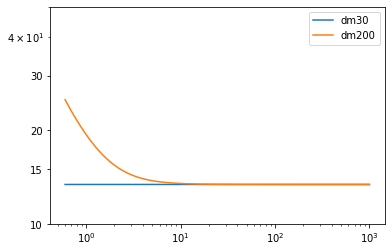

In [2]:
Tsys = 26
npol=2
beta=1.1
bw=650e6
tobs=2.5*60*60
G=1.84
snr=10
fc=1.3
tsamp=76e-6
const = (snr*beta*Tsys)/(G*np.sqrt(npol*bw*tobs))
#tscat = np.exp(-6.46+(0.154*np.log(DM))+(1.07*(np.log(DM))**2)-(3.86*np.log(fc)))

def smean_cal(per,dm,const,fc):
    tscat_ms= 10**(-6.46+(0.154*np.log10(dm))+(1.07*(np.log10(dm)**2))-(3.86*np.log10(fc)))
    tscat=tscat_ms/1e3
    #print("tscat",tscat)
    smean=[]
    for p in per:
        wint=0.08*p
        wobs=np.sqrt((wint**2)+(tscat**2))
        sm=const*(np.sqrt(wobs/(p-wobs)))*1e6
        smean.append(sm)
    return smean

p=np.arange(0.0006,1.0,0.00001)

smean_30=smean_cal(p,30,const,fc)
smean_200=smean_cal(p,200,const,fc)
fig,ax=plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(10,50)
#ax.set_xticks([0.1,1,10,100,1000])
ax.set_yticks([10,15,20,30])
y_formatter = ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
ax.plot(p*1e3,smean_30,label='dm30')
ax.plot(p*1e3,smean_200,label='dm200')
ax.legend()
plt.show()

tscat 4.095904621350196e-06
DM 50


/usr/lib/python3/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in sqrt


tscat 0.0004614469573662614
DM 150
tscat 0.006082213066045611
DM 250
tscat 2.6683563339472444e-05
DM 50
tscat 0.0030061855079600323
DM 150
tscat 0.03962375411429751
DM 250


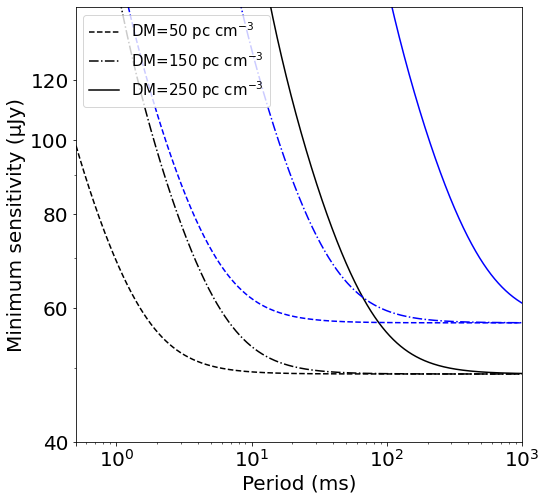

In [3]:
#1-- band-4, 2-- band-3

Tsys1 = 102.5
Tsys2 = 130
Tsys_gbt = 57

npol=2

beta=1.1

bw=180e6
bw_gbt= 580e6

tobs=2.0*60*60
tobs_gbt= 4.0*60*60


G1=4.2
G2=4.56

G_gbt=2.0

snr=10
fc_b4=0.65
fc_b3=0.40

fc_gbt=1.44

#tsamp=81.92e-6
tsamp=80e-6
ddm=0.015

t_ddm_1 = (4.1 *((0.55)**(-2)-(0.75)**(-2))*(ddm))*1e-3    #in seconds for band-4
t_ddm_2 = (4.1 *((0.3)**(-2)-(0.5)**(-2))*(ddm))*1e-3    #in seconds for band-3

const1 = (snr*beta*Tsys1)/(G1*np.sqrt(npol*bw*tobs))
const2 = (snr*beta*Tsys2)/(G2*np.sqrt(npol*bw*tobs))

const_gbt_L = (snr*beta*Tsys_gbt)/(G_gbt*np.sqrt(npol*bw_gbt*tobs_gbt))

#tscat = np.exp(-6.46+(0.154*np.log(DM))+(1.07*(np.log(DM))**2)-(3.86*np.log(fc)))

def smean_cal(per,dm,const,fc,tsamp,t_ddm):
    tscat_ms= 10**(-6.46+(0.154*np.log10(dm))+(1.07*(np.log10(dm)**2))-(3.86*np.log10(fc)))
    tscat=tscat_ms/1e3
    print("tscat",tscat)
    print("DM",dm)
    smean=[]
    for p in per:
        wint=0.08*p
        
        #print("wint:",wint)
        wobs=np.sqrt((wint**2)+(tscat**2)+(t_ddm**2)+(tsamp**2))
        sm=const*(np.sqrt(wobs/(p-wobs)))*1e6
        smean.append(sm)
    return smean

p=np.arange(0.0001,1.0,0.00001)

smean_50=smean_cal(p,50,const1,fc_b4,tsamp,t_ddm_1)
smean_150=smean_cal(p,150,const1,fc_b4,tsamp,t_ddm_1)
smean_250=smean_cal(p,250,const1,fc_b4,tsamp,t_ddm_1)

smean_50_2=smean_cal(p,50,const2,fc_b3,tsamp,t_ddm_2)
smean_150_2=smean_cal(p,150,const2,fc_b3,tsamp,t_ddm_2)
smean_250_2=smean_cal(p,250,const2,fc_b3,tsamp,t_ddm_2)

#smean_150_gbt=smean_cal(p,150,const_gbt_L,fc_gbt)

fig,ax=plt.subplots(figsize=(8,8))
plt.rc('font', size=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(45,150)
ax.set_xlim(0.5,1000)
ax.set_xticks([0.5,1,10,100,1000])
ax.set_yticks([40,60,80,100,120])
y_formatter = ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
ax.plot(p*1e3,smean_50,'--',label='DM=50 pc cm$^{-3}$',color='black')
ax.plot(p*1e3,smean_150,'-.',label='DM=150 pc cm$^{-3}$',color='black')
ax.plot(p*1e3,smean_250,'-',label='DM=250 pc cm$^{-3}$',color='black')

ax.plot(p*1e3,smean_50_2,'--',color='blue')
ax.plot(p*1e3,smean_150_2,'-.',color='blue')
ax.plot(p*1e3,smean_250_2,'-',color='blue')
#ax.axhline(100c)
#ax.plot(p*1e3,smean_150_gbt,'-.',label='GBT DM=150 pc cm$^{-3}$',color='green')

ax.set_xlabel("Period (ms)")
ax.set_ylabel("Minimum sensitivity (\u03bcJy)")
ax.legend()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.savefig('sensitivity_gmrt_gc.pdf',format='pdf')
plt.show()

tscat 4.095904621350196e-06
DM 50


/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in sqrt


tscat 0.0004614469573662614
DM 150
tscat 0.006082213066045611
DM 250
tscat 0.006082213066045611
DM 250
tscat 2.6683563339472444e-05
DM 50
tscat 0.0030061855079600323
DM 150
tscat 0.03962375411429751
DM 250
tscat 0.03962375411429751
DM 250


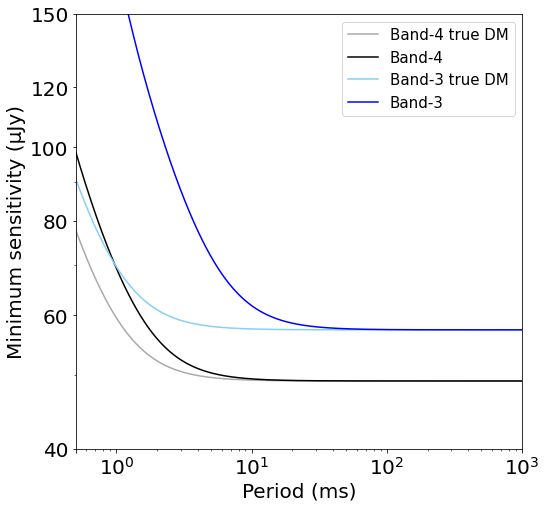

In [21]:
#Excluding scattering term

#1-- band-4, 2-- band-3

Tsys1 = 102.5
Tsys2 = 130
Tsys_gbt = 57

npol=2

beta=1.1

bw=180e6
bw_gbt= 580e6

tobs=2.0*60*60
tobs_gbt= 4.0*60*60


G1=4.2
G2=4.56

G_gbt=2.0

snr=10
fc_b4=0.65
fc_b3=0.40

fc_gbt=1.44

#tsamp=81.92e-6
tsamp=80e-6
ddm=0.015 # 0.015

t_ddm_1 = (4.1 *((0.55)**(-2)-(0.75)**(-2))*(ddm))*1e-3    #in seconds for band-4
t_ddm_2 = (4.1 *((0.3)**(-2)-(0.5)**(-2))*(ddm))*1e-3    #in seconds for band-3

const1 = (snr*beta*Tsys1)/(G1*np.sqrt(npol*bw*tobs))
const2 = (snr*beta*Tsys2)/(G2*np.sqrt(npol*bw*tobs))

const_gbt_L = (snr*beta*Tsys_gbt)/(G_gbt*np.sqrt(npol*bw_gbt*tobs_gbt))

#tscat = np.exp(-6.46+(0.154*np.log(DM))+(1.07*(np.log(DM))**2)-(3.86*np.log(fc)))

def smean_cal(per,dm,const,fc,tsamp,t_ddm):
    tscat_ms= 10**(-6.46+(0.154*np.log10(dm))+(1.07*(np.log10(dm)**2))-(3.86*np.log10(fc)))
    tscat=tscat_ms/1e3
    print("tscat",tscat)
    print("DM",dm)
    smean=[]
    for p in per:
        wint=0.08*p
        
        #print("wint:",wint)
        wobs=np.sqrt((wint**2)+(t_ddm**2)+(tsamp**2))
        sm=const*(np.sqrt(wobs/(p-wobs)))*1e6  #in uJy
        smean.append(sm)
    return smean


p=np.arange(0.0001,1.0,0.00001)

#BAND-4
smean_50=smean_cal(p,50,const1,fc_b4,tsamp,t_ddm_1)
smean_150=smean_cal(p,150,const1,fc_b4,tsamp,t_ddm_1)
smean_250=smean_cal(p,250,const1,fc_b4,tsamp,t_ddm_1)
smean_250_tdm0=smean_cal(p,250,const1,fc_b4,tsamp,0)

#BAND-3
smean_50_2=smean_cal(p,50,const2,fc_b3,tsamp,t_ddm_2)
smean_150_2=smean_cal(p,150,const2,fc_b3,tsamp,t_ddm_2)
smean_250_2=smean_cal(p,250,const2,fc_b3,tsamp,t_ddm_2)
smean_250_2_tdm0=smean_cal(p,250,const2,fc_b3,tsamp,0)


#smean_150_gbt=smean_cal(p,150,const_gbt_L,fc_gbt)

fig,ax=plt.subplots(figsize=(8,8))
plt.rc('font', size=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(45,150)
ax.set_xlim(0.5,1000)
ax.set_xticks([0.5,1,10,100,1000])
ax.set_yticks([40,60,80,100,120,150])
y_formatter = ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
#ax.plot(p*1e3,smean_50,'--',color='black')
#ax.plot(p*1e3,smean_150,'-.',color='black')
ax.plot(p*1e3,smean_250_tdm0,'-',label='Band-4 true DM',color='darkgrey')
ax.plot(p*1e3,smean_250,'-',label='Band-4',color='black')
#ax.plot(p*1e3,smean_50_2,'--',color='blue')
#ax.plot(p*1e3,smean_150_2,'-.',color='blue')

ax.plot(p*1e3,smean_250_2_tdm0,'-',label='Band-3 true DM',color='lightskyblue')
ax.plot(p*1e3,smean_250_2,'-',label='Band-3',color='blue')
#ax.axvline(5)
#ax.plot(p*1e3,smean_150_gbt,'-.',label='GBT DM=150 pc cm$^{-3}$',color='green')

ax.set_xlabel("Period (ms)")
ax.set_ylabel("Minimum sensitivity (\u03bcJy)")
ax.legend()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.savefig('sensitivity_gmrt_gc_excluding_scattering.pdf',format='pdf')
plt.show()

In [5]:
def scatt_expected(fc,dm):
    tscat_ms= 10**(-6.46+(0.154*np.log10(dm))+(1.07*(np.log10(dm)**2))-(3.86*np.log10(fc)))
    return tscat_ms

ngc1851a = scatt_expected(0.4,52.15)
ngc6539 = scatt_expected(0.4,186.32)
m30 = scatt_expected(0.4,25.09)
ngc6652 = scatt_expected(0.4,63.35)
ngc6440 = scatt_expected(0.65,223.0)
ngc6441 = scatt_expected(0.65,232.0)
ngc6544b = scatt_expected(0.65,137.30)
ter5 = scatt_expected(0.65,238.73)

print('ngc1851a',ngc1851a)
print('ngc6539',ngc6539)
print('m30',m30)
print('ngc6652',ngc6652)
print('ngc6440',ngc6440)
print('ngc6441',ngc6441)
print('ngc6544b',ngc6544b)
print('ter5',ter5)

ngc1851a 0.03132530718976968
ngc6539 8.720310420312927
m30 0.0024393593558503968
ngc6652 0.06715040777509493
ngc6440 3.344618773659738
ngc6441 4.108282865034096
ngc6544b 0.3025976177652091
ter5 4.770948524131341


In [11]:
def scatt_expected(fc,dm):
    tscat_ms= 10**(-6.46+(0.154*np.log10(dm))+(1.07*(np.log10(dm)**2))-(3.86*np.log10(fc)))
    #logtscat_ms = (-6.46+(0.154*np.log10(dm))+(1.07*(np.log10(dm)**2))-(3.86*np.log10(fc)))
    return tscat_ms

ngc1851a = scatt_expected(0.4,52.14)
ngc6539a = scatt_expected(0.412,186.49)
ngc6652b = scatt_expected(0.33,63.51)
ngc6440a = scatt_expected(0.65,221.77)

ngc6544a = scatt_expected(0.662,133.99)
ngc6544b = scatt_expected(0.600,137.23)

ter5a = scatt_expected(0.640,242.39)
#ter5h = scatt_expected(0.65,238.15)
ter5i = scatt_expected(0.700,238.55)
#ter5l = scatt_expected(0.625,237.63)
ter5n = scatt_expected(0.625,238.31)
#ter5o = scatt_expected(0.65,236.17)

print('1851a',ngc1851a)
print('ter5a',ter5a)
print('ter5h',ter5h)
print('ter5i',ter5i)
print('ter5l',ter5l)
print('ter5n',ter5n)
print('ter5o',ter5o)
print('ngc6440a',ngc6440a)
print('ngc6539a',ngc6539a)
print('ngc6544a',ngc6544a)
print('ngc6544b',ngc6544b)
print('ngc6652b',ngc6652b)

1851a 0.031302314493736556
ter5a 5.486364234779392
ter5h 4.710504798571266
ter5i 3.5698878457835663
ter5l 4.65686397362509
ter5n 5.499773105911541
ter5o 4.50900131616559
ngc6440a 3.2502113283249043
ngc6539a 7.815660502339982
ngc6544a 0.25130714377575003
ngc6544b 0.4111497424378488
ngc6652b 0.14253789430912003


In [8]:
def scatt_expected_kkumar(fc,dm):
    fc_ref=1 #1GHz
    tscat_s_1ghz = 4.1*10**(-11)*dm**(2.2)*(1.0+(0.00194*dm**2))
    tscat_s_fc = fc**(-4.0)*tscat_s_1ghz/(fc_ref**(-4.0))
    #tscat_ms= 10**(-6.46+(0.154*np.log10(dm))+(1.07*(np.log10(dm)**2))-(3.86*np.log10(fc)))
    #logtscat_ms = (-6.46+(0.154*np.log10(dm))+(1.07*(np.log10(dm)**2))-(3.86*np.log10(fc)))
    return tscat_s_fc

ngc1851a = scatt_expected_kkumar(0.4,52.14)
ngc6539a = scatt_expected_kkumar(0.4,186.49)
ngc6652b = scatt_expected_kkumar(0.4,63.51)
ngc6440a = scatt_expected_kkumar(0.65,219.0)

ngc6544a = scatt_expected_kkumar(0.65,133.99)
ngc6544b = scatt_expected_kkumar(0.65,137.23)

ter5a = scatt_expected_kkumar(0.65,242.39)
ter5h = scatt_expected_kkumar(0.65,238.15)
ter5i = scatt_expected_kkumar(0.65,238.55)
ter5l = scatt_expected_kkumar(0.65,237.63)
ter5n = scatt_expected_kkumar(0.65,238.31)
ter5o = scatt_expected_kkumar(0.65,236.17)
print('SCATTERING TIMESCALE ACCORDING TO KRISHNAKUMAR ET AL 2015 IN SECONDS SCALED TO fc')
print('ngc1851a',ngc1851a)
print('ngc6539a',ngc6539a)
print('ngc6440a',ngc6440a)
print('ngc6544a',ngc6544a)
print('ngc6544b',ngc6544b)
print('ter5a',ter5a)
print('ter5h',ter5h)
print('ter5i',ter5i)
print('ter5l',ter5l)
print('ter5n',ter5n)
print('ter5o',ter5o)
print('ngc6652b',ngc6652b)

SCATTERING TIMESCALE ACCORDING TO KRISHNAKUMAR ET AL 2015 IN SECONDS SCALED TO fc
ngc1851a 6.023761104044651e-05
ngc6539a 0.010851468491509803
ngc6440a 0.0030439684427287254
ngc6544a 0.00039348638886969715
ngc6544b 0.00043445598182695994
ter5a 0.004652512243703984
ter5h 0.004321494070573419
ter5i 0.00435193020442617
ter5l 0.004282170193037338
ter5n 0.004333648970545174
ter5o 0.00417321906599034
ngc6652b 0.0001307713720413357


22454.229903635918


/home/tasha/.local/lib/python3.6/site-packages/numpy/core/function_base.py:265: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


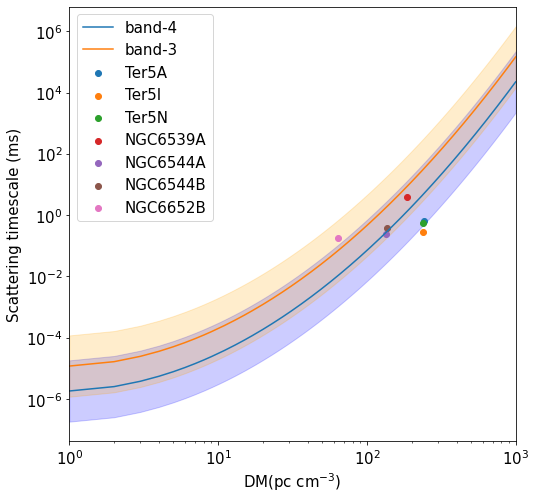

In [90]:
#Plotting scattering fit of Bhat et al and overplotting my estimate on it.

def scatt_expected_bhat(fc,dm):
    tscat_ms_bhat=[]
    for dmval in dm:
        tscat_ms_bhat.append((10**(-6.46+(0.154*np.log10(dmval))+(1.07*((np.log10(dmval))**2))-(3.86*np.log10(fc)))))
    return tscat_ms_bhat

dmrange=np.arange(1,1000,1)
fc_1=0.65
fc_2=0.4


tscat_s_bhat_1=scatt_expected_bhat(fc_1,dmrange)
tscat_s_bhat_2=scatt_expected_bhat(fc_2,dmrange)
loger=np.logspace(10, 1000, num=len(tscat_ms_bhat_1), endpoint=True, base=10.0, dtype=None, axis=0)
#plt.xscale("log")
#plt.yscale("log")
fig,ax=plt.subplots(figsize=(8,8))
#plt.rc('font', size=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1,1000)
ax.set_xticks([1,10,100,1000])
ax.set_xlabel("DM(pc cm$^{-3}$)")
ax.set_ylabel("Scattering timescale (ms)")
ax.plot(dmrange,tscat_s_bhat_1,label='band-4')
tscat_ms_bhat_1_l=[]
tscat_ms_bhat_1_h=[]
tscat_ms_bhat_2_l=[]
tscat_ms_bhat_2_h=[]

for tscat in tscat_ms_bhat_1:
    tscat_ms_bhat_1_l.append(tscat/10)
    tscat_ms_bhat_1_h.append(tscat*10)

print(max(tscat_ms_bhat_1))
#print(max(tscat_ms_bhat_1_l))
plt.fill_between(dmrange, tscat_ms_bhat_1_l, tscat_ms_bhat_1_h,
                        color='blue', alpha=0.2)

for tscat in tscat_ms_bhat_2:
    
    tscat_ms_bhat_2_l.append(tscat/(10))
    tscat_ms_bhat_2_h.append(tscat*(10))

plt.fill_between(dmrange, tscat_ms_bhat_2_l, tscat_ms_bhat_2_h,
                        color='orange', alpha=0.2)
ax.plot(dmrange,tscat_s_bhat_2,label='band-3')

#dm_obs=[242.39,238.55,238.31,186.49,133.99,137.23,63.51]
#scat_obs=[0.64,0.29,0.56,3.80,0.25,0.37,0.174]         
#psr=["Ter5A","Ter5I","Ter5N","NGC6539A","NGC6544A","NGC6544B","NGC6652B"]           
#ax.scatter(dm_obs,scat_obs)
#for i, txt in enumerate(psr):
#        ax.annotate(txt,xy=(dm_obs[i],scat_obs[i]))
ax.scatter(242.39,0.64,label='Ter5A')
ax.scatter(238.55,0.29,label='Ter5I')
ax.scatter(238.31,0.56,label='Ter5N')
ax.scatter(186.49,3.80,label='NGC6539A')
ax.scatter(133.99,0.25,label='NGC6544A')
ax.scatter(137.23,0.37,label='NGC6544B')
ax.scatter(63.51,0.174,label='NGC6652B')

ax.legend()